In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
db = pd.read_csv('DADOS_RET_CATEGORIAS.csv')

## Quarta e Quinta são os melhores dias para compra

In [4]:
#sintaxe para avaliar o melhor dia de compra
melhor_dia = db.query('DevoComprar == True')
melhor_dia['DiaSemana'].value_counts()

Quarta     283
Quinta     227
Terça      136
Segunda     91
Sexta       64
Name: DiaSemana, dtype: int64

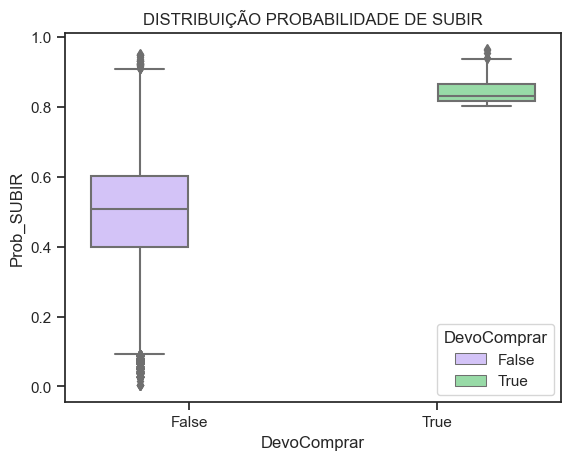

In [3]:
sns.set_theme(style="ticks", palette="pastel");
sns.boxplot(x=db['DevoComprar'], y=db['Prob_SUBIR'], hue=db['DevoComprar'], palette=['m','g']);
plt.title('DISTRIBUIÇÃO PROBABILIDADE DE SUBIR');

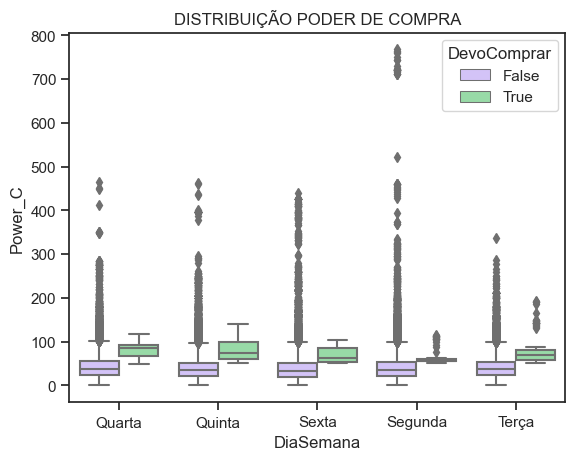

In [4]:
sns.set_theme(style="ticks", palette="pastel");
sns.boxplot(x=db['DiaSemana'], y=db['Power_C'], hue=db['DevoComprar'], palette=['m','g']);
plt.title('DISTRIBUIÇÃO PODER DE COMPRA');

In [330]:
db_heat = pd.concat([db.loc[:, 'Close_VALE'],db.loc[:,'Close_PETR'], db.loc[:, 'Ind_C'], db.loc[:, 'Ind_V'],
                    db.loc[:, 'Prob_SUBIR'], db.loc[:, 'Power_C'], db.loc[:, 'Power_V'], db.loc[:, 'Prob_SUBIR_Corr']], axis=1)

<Axes: >

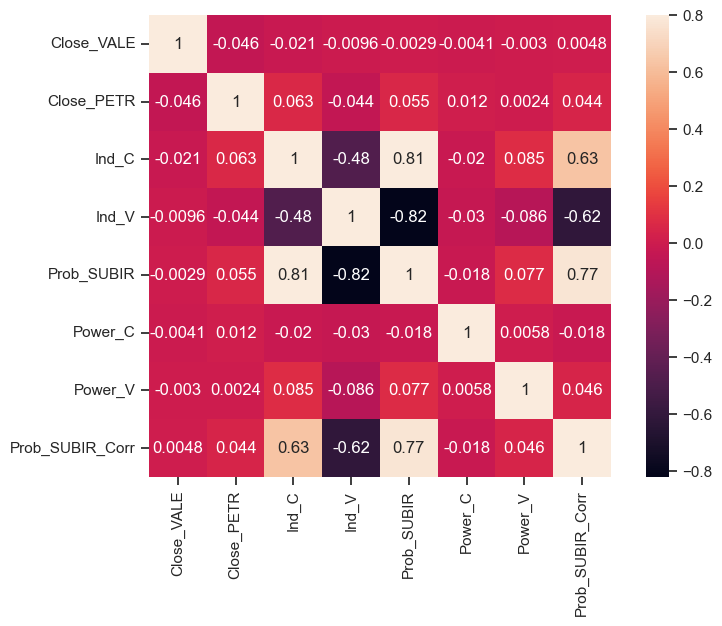

In [331]:
comrat = db_heat.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(comrat,vmax=0.8, square=True, annot=True)

## Dos dados estudados no heatmap - as correlações que se destacam são - Prob_SUBIR c/ Ind_V (negativa forte), Ind_C (positiva forte) 

# Clusters


In [430]:
clust = db.copy()
clust = clust[50500:50800]

In [431]:
clust = pd.concat([clust.loc[:, 'Prob_SUBIR'], clust.loc[:,'LastPrice']], axis=1)

In [432]:
clust.fillna(0, inplace=True)

In [433]:
clust.isnull().sum()

Prob_SUBIR    0
LastPrice     0
dtype: int64

In [445]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=7, random_state=0).fit(clust)
cluster.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 1, 4, 1,
       4, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 3, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5])

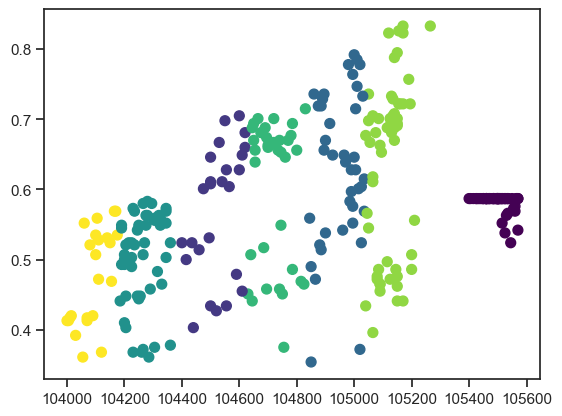

In [438]:
plt.scatter(clust['LastPrice'], clust['Prob_SUBIR'], c=cluster.labels_ , cmap='viridis', s=50)

# Regras de Associação

In [5]:
from apyori import apriori
x = db[['DiaSemana','DevoComprar', 'Cat_Prob_SUBIR']]
def amostragem_simples(dataset, amostras):
  return dataset.sample(n=amostras, random_state=1)
samples = amostragem_simples(x, 1000)
transacoes = []
for i in range (0, 1000):
    transacoes.append([str(samples.values[i,j]) for j in range(0,3)])


In [6]:
association_rules = apriori(transacoes, min_support=0.009, min_confidence=0.4, min_length=2)
resultados = list(association_rules)

In [21]:
resultados2 = [list(x) for x in resultados]
resul = []
for j in range(22,34):
    resul.append([list(x) for x in resultados2[j][2]])
resul

[[[frozenset({'A', 'Terça'}), frozenset({'False'}), 1.0, 1.0111223458038423]],
 [[frozenset({'B', 'Quarta'}), frozenset({'False'}), 1.0, 1.0111223458038423]],
 [[frozenset({'B', 'Quinta'}), frozenset({'False'}), 1.0, 1.0111223458038423]],
 [[frozenset({'B', 'Segunda'}),
   frozenset({'False'}),
   1.0,
   1.0111223458038423]],
 [[frozenset({'B', 'Sexta'}), frozenset({'False'}), 1.0, 1.0111223458038423]],
 [[frozenset({'B', 'Terça'}), frozenset({'False'}), 1.0, 1.0111223458038423]],
 [[frozenset({'Quarta'}),
   frozenset({'False', 'M'}),
   0.48471615720524014,
   1.0424003380757851],
  [frozenset({'False', 'Quarta'}),
   frozenset({'M'}),
   0.4955357142857143,
   1.0656682027649769],
  [frozenset({'M', 'Quarta'}), frozenset({'False'}), 1.0, 1.0111223458038423]],
 [[frozenset({'Quinta'}),
   frozenset({'False', 'M'}),
   0.4717948717948718,
   1.0146126275158533],
  [frozenset({'False', 'Quinta'}),
   frozenset({'M'}),
   0.47916666666666663,
   1.0304659498207884],
  [frozenset({'M', 

# KNN e Árvore de Decisão

In [22]:
from sklearn.model_selection import train_test_split

db.fillna(0, inplace=True)
y = db['DevoComprar']

colunas = ['DiaSemana', 'Data', 'Cat_Prob_SUBIR', 'DevoComprar']

x = db.drop(columns=colunas)

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)
    

#modelo árvore de decisão
from sklearn.ensemble import RandomForestClassifier

#Modelo KNN
from sklearn.neighbors import KNeighborsClassifier

modelo_arvoredecisao = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

modelo_arvoredecisao.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [23]:
#escolhendo o melhor modelo
from sklearn.metrics import accuracy_score

previsao_arvore = modelo_arvoredecisao.predict(x_teste)

previsao_knn = modelo_knn.predict(x_teste.to_numpy())

#vendo a accuracy

a = accuracy_score(y_teste, previsao_arvore)
b = accuracy_score(y_teste, previsao_knn)

print(a)
print(b)

0.9996694821887624
0.9951891296364304


## Grande acurácia dos modelos preditivos - bons para uso

# Regressão Linear

In [24]:
from sklearn.linear_model import LinearRegression

regressao = db.copy()
amostra = regressao[10000:10100] 

x = amostra['LastPrice'].values.reshape(-1, 1)
y = amostra['Prob_SUBIR']

modelo = LinearRegression()
modelo.fit(x,y)

#por serem dados em exagero - peguei uma amostra enviesada - já que a bolsa funciona por minuto, posso considerar dados 
#contínuos para o cálculo, mas há possibilidade de que outros gaps de tempo me trouxexem respostas diferentes

LinearRegression()

In [25]:
Q1 = amostra['Prob_SUBIR'].quantile(0.25)
Q3 = amostra['Prob_SUBIR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = amostra[(amostra['Prob_SUBIR'] < lower_bound) | (amostra['Prob_SUBIR'] > upper_bound)]

median_value = amostra['Prob_SUBIR'].median()
amostra['Prob_SUBIR'] = np.where((amostra['Prob_SUBIR'] < lower_bound) | (amostra['Prob_SUBIR'] > upper_bound), 
                                 median_value, amostra['Prob_SUBIR'])

In [26]:
Q1 = amostra['LastPrice'].quantile(0.25)
Q3 = amostra['LastPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = amostra[(amostra['LastPrice'] < lower_bound) | (amostra['LastPrice'] > upper_bound)]

median_value = amostra['LastPrice'].median()
amostra['LastPrice'] = np.where((amostra['LastPrice'] < lower_bound) | (amostra['LastPrice'] > upper_bound), 
                                 median_value, amostra['LastPrice'])

In [397]:
a_coeff = modelo.coef_
l_coeff = modelo.intercept_

b = l_coeff + a_coeff * x

In [398]:
print('Coeficiente Angular: {0}\nCoeficiente Linear {1}'.format(a_coeff,l_coeff))

Coeficiente Angular: [0.00018731]
Coeficiente Linear -11.401585822605833


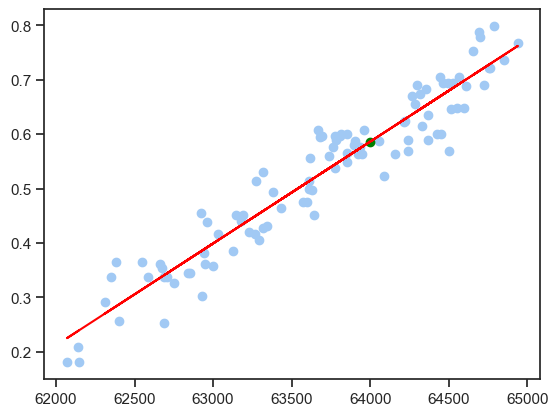

In [401]:
plt.scatter(amostra['LastPrice'], amostra['Prob_SUBIR'])
plt.plot(x, l_coeff + a_coeff*x , color='red')
plt.scatter(64000, l_coeff + a_coeff*64000, color='green')
plt.show()

In [449]:
amostra['Y_pred'] = modelo.predict(amostra['LastPrice'].values.reshape(-1,1))

In [403]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(amostra['Prob_SUBIR'], amostra['Y_pred']))
print(mean_squared_error(amostra['Prob_SUBIR'], amostra['Y_pred']))

0.034645448175994395
0.0017792697071916217


# modelo não apresentou grandes margens de erros